# Ultimate Technologies Inc

In [1]:
# libraries

import json

import pandas as pd
import numpy as np
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split


## Read Data Files

### Login Data

In [2]:
# read login data file

# load the json file as a list and convert to a df
with open('logins.json') as f:
   logins = pd.DataFrame(json.load(f)) 

# convert login_time to datetime column type
logins['login_time'] = pd.to_datetime(logins['login_time']) 

logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


### Challenge Data

In [4]:
# read challenge data file

with open('ultimate_data_challenge.json') as f:
   udc = pd.DataFrame(json.load(f)) # load the json file as a list and convert to a df
udc.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [5]:
# convert 2 columns to datetime format
udc['last_trip_date'] = pd.to_datetime(udc['last_trip_date'])
udc['signup_date'] = pd.to_datetime(udc['signup_date'])

In [6]:
# convert 2 columns to category format
udc['city'] = pd.Categorical(udc['city'])
udc['phone'] = pd.Categorical(udc['phone'])

In [7]:
udc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null category
last_trip_date            50000 non-null datetime64[ns]
phone                     49604 non-null category
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), category(2), datetime64[ns](2), float64(6), int64(1)
memory usage: 3.6 MB


In [8]:
udc.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


## Data Description
- city: city this user signed up in
- phone: primary device for this user


- signup_date: date of account registration; in the form ‘YYYYMMDD’
- last_trip_date: the last time this user completed a trip; in the form ‘YYYYMMDD’


- avg_dist: the average distance in miles per trip taken in the first 30 days after signup


- avg_rating_by_driver: the rider’s average rating over all of their trips
- avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips


- surge_pct: the percent of trips taken with surge multiplier > 1
- avg_surge: The average surge multiplier over all of this user’s trips


- trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up
- ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise
- weekday_pct: the percent of the user’s trips occurring during a weekday

In [9]:
# list of cities in df

udc.city.value_counts()

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64

In [10]:
# list of phones in df

udc.phone.value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

# PART 1 ‑ Exploratory Data Analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15­minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

## Login Data

### Aggregate (15 min intervals)

In [11]:
# resample the login data by 15 minute intervals

# set the time interval
per = '15min' 

# resample the login data per time period
fifteen_min = logins.resample(per, on='login_time').count() 

# rename index and column headers
fifteen_min.index.names = ['time period']
fifteen_min.columns = ['logins']

fifteen_min.head()

,logins
time period,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


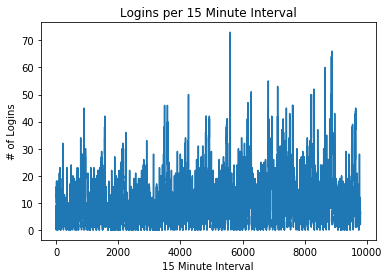

In [12]:
# plot num of logins per day of the week

_ = sns.lineplot(x=list(range(len(fifteen_min))), 
            y='logins',
            data=fifteen_min)

_ = plt.title('Logins per 15 Minute Interval')
_ = plt.xlabel('15 Minute Interval')
_ = plt.ylabel('# of Logins')

### Aggregate (day of the week)

In [13]:
# aggregate by day of the week (Monday - Sunday)


dow = pd.DataFrame(logins.login_time.dt.dayofweek.value_counts().sort_index())
dow.columns = ['logins']
dow

,logins
0,8823
1,9268
2,10339
3,11960
4,15208
5,19377
6,18167


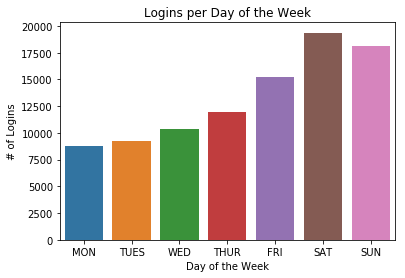

In [14]:
# plt num of logins per day of the week

_ = sns.barplot(x=dow.index, 
            y='logins',
            data=dow)

_ = _.set_xticklabels(['MON', 'TUES', 'WED', 'THUR', 'FRI', 'SAT', 'SUN'])
_ = plt.title('Logins per Day of the Week')
_ = plt.xlabel('Day of the Week')
_ = plt.ylabel('# of Logins')

The number of logins per day of the week increase

### Aggregate (hour of the day)

In [15]:
# aggregate by hour of the day (0 - 23)

hod = pd.DataFrame(logins.login_time.dt.hour.value_counts().sort_index())
hod.columns = ['logins']
hod

,logins
0,5993
1,6317
2,5800
3,4831
4,5034
5,2945
6,1138
7,815
8,818
9,1527


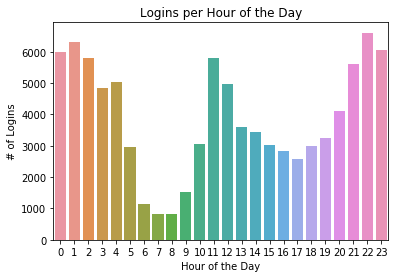

In [16]:
# plot num of logins per hour of the day

_ = sns.barplot(x=hod.index, 
            y='logins',
            data=hod)

#_ = _.set_xticklabels(['MON', 'TUES', 'WED', 'THUR', 'FRI', 'SAT', 'SUN'])
_ = plt.title('Logins per Hour of the Day')
_ = plt.xlabel('Hour of the Day')
_ = plt.ylabel('# of Logins')

## Challenge Data

### Review Null Values

In [17]:
# count how many null values per row

udc_null = udc.isnull().sum(axis=1).to_frame()
udc_null.columns = ['null_count'] # set column header name

# count how many rows have 0,1,2... null values
null_count = {}
null_perc = {}
for n in range(len(udc.columns)):
    n_rows = udc_null[udc_null['null_count'] == n].size
    if n_rows > 0:
        null_count[n] = n_rows
        null_perc[n] = 100 * n_rows / udc.shape[0]
    
print('# of nulls vs. # of rows')
print(null_count)
print()
print('# of nulls vs. % of rows')
print(null_perc)

# of nulls vs. # of rows
{0: 41445, 1: 8393, 2: 160, 3: 2}

# of nulls vs. % of rows
{0: 82.890000000000001, 1: 16.786000000000001, 2: 0.32000000000000001, 3: 0.0040000000000000001}


In [18]:
# add a column for how many null values per row

udc['null_count'] = udc_null['null_count']
udc.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,null_count
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,0
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0


In [19]:
# count how many null values per row
print(udc.isna().sum())

avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
avg_surge                    0
city                         0
last_trip_date               0
phone                      396
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
ultimate_black_user          0
weekday_pct                  0
null_count                   0
dtype: int64


### Plot Ratings

C:\Users\Miles\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Miles\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


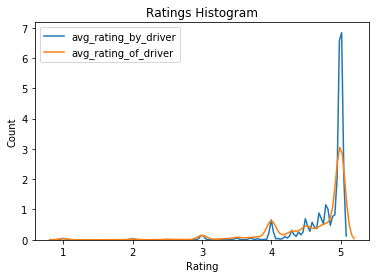

In [20]:
# histogram for the 2 rating columns

_ = sns.kdeplot(udc.avg_rating_by_driver)
_ = sns.kdeplot(udc.avg_rating_of_driver)

_ = plt.title('Ratings Histogram')
_ = plt.xlabel('Rating')
_ = plt.ylabel('Count')

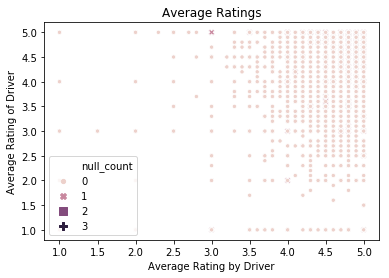

In [21]:
# scatter plot for the 2 rating columns vs each other

_ = sns.scatterplot(x='avg_rating_by_driver', 
                    y='avg_rating_of_driver', 
                    data = udc, 
                    hue='null_count', 
                    size='null_count', 
                    style='null_count')

_ = plt.title('Average Ratings')
_ = plt.xlabel('Average Rating by Driver')
_ = plt.ylabel('Average Rating of Driver')
_ = plt.legend(loc='lower left')

In [22]:
print(udc.isna().sum())

avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
avg_surge                    0
city                         0
last_trip_date               0
phone                      396
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
ultimate_black_user          0
weekday_pct                  0
null_count                   0
dtype: int64


### Address Null Values

In [23]:
# for numeric columns with nan values, replace nan with the mean of the column

from pandas.api.types import is_numeric_dtype

for col in udc.columns[udc.isna().any()].tolist():
    if is_numeric_dtype(udc[col]):
        udc[col].fillna((udc[col].mean()), inplace=True)

print(udc.isna().sum())

avg_dist                    0
avg_rating_by_driver        0
avg_rating_of_driver        0
avg_surge                   0
city                        0
last_trip_date              0
phone                     396
signup_date                 0
surge_pct                   0
trips_in_first_30_days      0
ultimate_black_user         0
weekday_pct                 0
null_count                  0
dtype: int64


In [24]:
# remove rows with nan values

udc = udc.dropna()

print(udc.isna().sum())

avg_dist                  0
avg_rating_by_driver      0
avg_rating_of_driver      0
avg_surge                 0
city                      0
last_trip_date            0
phone                     0
signup_date               0
surge_pct                 0
trips_in_first_30_days    0
ultimate_black_user       0
weekday_pct               0
null_count                0
dtype: int64


# PART 2 ‑ Experiment and Metrics Design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.


However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:

2a. how you will implement the experiment

2b. what statistical test(s) you will conduct to verify the significance of the observation

2c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.

## Active Users

In [25]:
# create active column

newest_date = max(list(udc['last_trip_date']))
oldest_date = min(list(udc['last_trip_date']))
active_date = newest_date - timedelta(days=30) 

print('Newest Date:', newest_date.date())
print('Oldest Date:', oldest_date.date())
print('Active Date:', active_date.date())

# if last_trip_date was within 30 days of the newest date
udc['active'] = np.where(udc['last_trip_date'] >= active_date, 'Active', 'Inactive')

# move the 'active' column to the front
udc = udc[udc.columns.tolist()[-1:] + udc.columns.tolist()[0:-1]]

udc.head()

Newest Date: 2014-07-01
Oldest Date: 2014-01-01
Active Date: 2014-06-01


,active,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,null_count
0,Active,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,0
1,Inactive,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0
2,Inactive,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0
3,Active,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,0
4,Inactive,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0


## Compare the Ratings by/of Active vs. Inactive Drivers

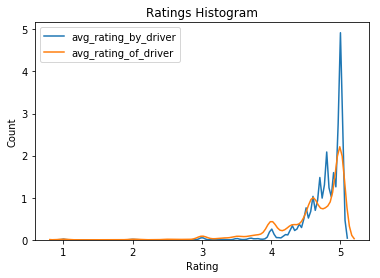

In [26]:
# histogram for the 2 rating columns for active drivers

_ = sns.kdeplot(udc.loc[udc['active'] == 'Active'].avg_rating_by_driver)
_ = sns.kdeplot(udc.loc[udc['active'] == 'Active'].avg_rating_of_driver)

_ = plt.title('Ratings Histogram')
_ = plt.xlabel('Rating')
_ = plt.ylabel('Count')

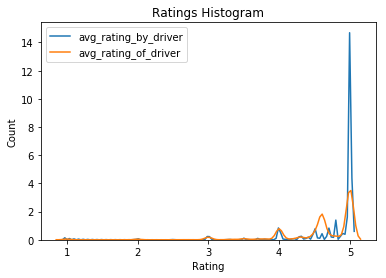

In [27]:
# histogram for the 2 rating columns for inactive drivers

_ = sns.kdeplot(udc.loc[udc['active'] == 'Inactive'].avg_rating_by_driver)
_ = sns.kdeplot(udc.loc[udc['active'] == 'Inactive'].avg_rating_of_driver)

_ = plt.title('Ratings Histogram')
_ = plt.xlabel('Rating')
_ = plt.ylabel('Count')

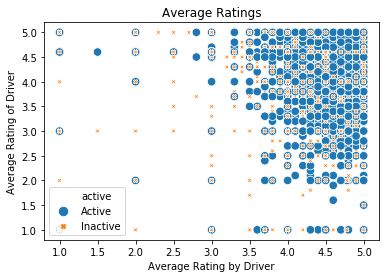

In [28]:
# scatter plot for the 2 rating columns vs each other

_ = sns.scatterplot(x='avg_rating_by_driver', 
                    y='avg_rating_of_driver', 
                    data = udc, 
                    hue='active', 
                    size='active', 
                    style='active')

_ = plt.title('Average Ratings')
_ = plt.xlabel('Average Rating by Driver')
_ = plt.ylabel('Average Rating of Driver')
_ = plt.legend(loc='lower left')

These last 3 plots compared the ratings of Active and Inactive drivers. For Active drivers, the ratings by the drivers were higher than the ratings of the drivers. For Inactive drivers, the ratings by the drivers were very similar to the ratings of the drivers.

## Experiment Details

### Measurements
The two key measurements that should be tracked during the experiement in encouraging driver partners to serve both cities would be volume and ratings by/of drivers before and after the experiment starts. For the experiment to be successful, inter -city trips should increase and ratings should at least stay the same if not increase.

### Implementation
A small percentage of the drivers would be selected for a pilot/beta program. This would allow for drivers to test out the program of reimburing all toll costs to increase the number of inter-city trips. 

### Statistics / Tests


### Interpret Results and Make Recommendations


# PART 3 ‑ Predictive Modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days. 

We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate. 

The data is in the attached file Ultimate_data_challenge.json. See below for a detailed description of the dataset.

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long­term rider retention (again, a few sentences will suffice).

## Correlation Matrix

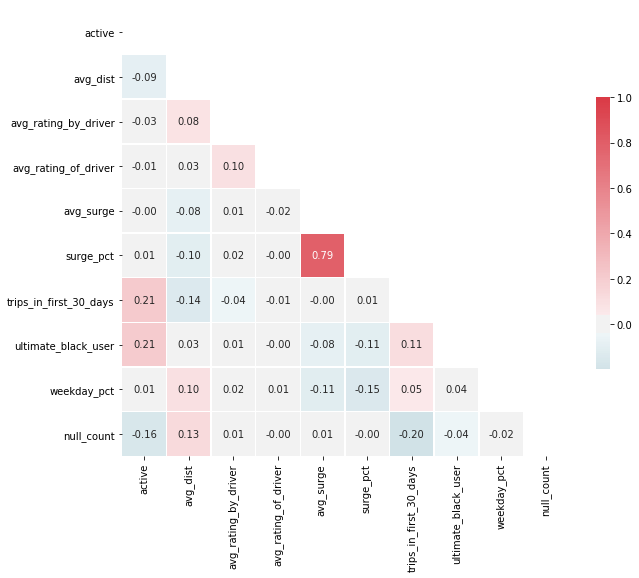

In [29]:
# convert active column to 1/0
act_dict = {'Active': 1, 'Inactive': 0}
udc = udc.replace({'active':act_dict})

# compute the correlation matrix
corr = udc.corr()

# generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
f, ax = plt.subplots(figsize=(10,10))

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
_ = sns.heatmap(corr, 
                mask=mask, 
                cmap=cmap, 
                center=0,
                square=True, 
                linewidths=.5, 
                cbar_kws={"shrink": .5}, 
                annot=True, 
                fmt='.2f')

The largely correlated values are 'surge_prct' and 'avg_surg' with a value of 0.79
- surge_pct: the percent of trips taken with surge multiplier > 1
- avg_surge: The average surge multiplier over all of this user’s trips

## Predict Active Drivers
Use the udc DataFrame to predict whether or not the driver will be active after 6 months.

### Initial Correlation
With an initial look at the data through the correlation plot for determining if a user is active or not, the best 2 indicators are "trips in first 30 days" and "ultimate black user". They aren't strong correlations relative to the scale -1 to 1, but relative to the other columns, they are 10-20 times stronger of a correlation.

### Convert Column Values into Numerical Values

In [30]:
# convert cities into numerical values
city_map = {"King's Landing":1, 'Astapor':2, 'Winterfell':3} # double quote for the ' in Kings
udc.city = udc.city.map(city_map)

# convert phones into numerical values
phone_map = {'iPhone':1, 'Android':2}
udc.phone = udc.phone.map(phone_map)

# Convert ultimate_black_user into numerical values
udc.ultimate_black_user = udc.ultimate_black_user.apply(lambda x: 1 if x else 0)

# remove date columns
udc.drop(['last_trip_date','signup_date', 'null_count'], axis = 1, inplace=True)

# check for null values
assert udc.isnull().sum().sum()==0

udc.head()

,active,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,phone,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,1,3.67,5.0,4.7,1.10,1,1,15.4,4,1,46.2
1,0,8.26,5.0,5.0,1.00,2,2,0.0,0,0,50.0
2,0,0.77,5.0,4.3,1.00,2,1,0.0,3,0,100.0
3,1,2.36,4.9,4.6,1.14,1,1,20.0,9,1,80.0
4,0,3.13,4.9,4.4,1.19,3,2,11.8,14,0,82.4


### Split UDC Data into X / Y

In [31]:
# create X

# remove the column for Y
X = udc.drop(['active'], axis=1)

X.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,phone,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,1,1,15.4,4,1,46.2
1,8.26,5.0,5.0,1.00,2,2,0.0,0,0,50.0
2,0.77,5.0,4.3,1.00,2,1,0.0,3,0,100.0
3,2.36,4.9,4.6,1.14,1,1,20.0,9,1,80.0
4,3.13,4.9,4.4,1.19,3,2,11.8,14,0,82.4


In [32]:
# create Y

y = udc['active']
y.head()

0    1
1    0
2    0
3    1
4    0
Name: active, dtype: int64

### Split X&Y into Train / Test

In [33]:
# split df into train / test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [34]:
X_train.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,phone,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
38929,3.09,4.9,4.100000,1.19,2,1,29.4,7,1,76.5
30454,2.48,5.0,4.700000,1.00,3,1,0.0,3,0,66.7
21950,1.67,5.0,4.601559,1.00,3,1,0.0,1,0,100.0
17205,8.21,4.9,4.300000,1.07,2,1,14.3,3,0,57.1
4911,6.90,5.0,5.000000,1.00,3,2,0.0,1,0,100.0


In [35]:
X_test.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,phone,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
11016,4.82,5.0,5.0,1.10,2,1,20.0,0,0,0.0
49651,4.03,4.8,4.9,1.20,2,1,35.0,7,0,60.0
23087,2.06,4.2,4.3,1.05,1,2,4.8,6,1,42.9
17790,2.15,4.7,4.8,1.40,3,1,20.0,6,1,60.0
48891,2.08,4.5,3.8,1.00,3,2,0.0,8,1,19.0


In [36]:
y_train.head()

38929    1
30454    0
21950    0
17205    0
4911     0
Name: active, dtype: int64

In [37]:
y_test.head()

11016    0
49651    1
23087    1
17790    0
48891    1
Name: active, dtype: int64

### Information Value Analysis v2

In [38]:
# import model evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, f1_score, roc_curve

In [39]:
# define model evaluation method

def model_test(model, ytest, y_predict):
    print('The accuracy of {} model is: {:.2f}'.format(model, accuracy_score(ytest, y_predict)))
    print('The confusion matrix is:\n{}'.format(confusion_matrix(ytest, y_predict)))
    print('The auc score is: {:.2f}'.format(roc_auc_score(ytest, y_predict)))
    print('The F1-score is: {:.2f}'.format(f1_score(ytest, y_predict)))

In [40]:
# define auc plotting method

def plot_roc(model, ytest, y_predict, y_predict_prob):
    fpr, tpr, _ = roc_curve(ytest, y_predict_prob)
    plt.figure(figsize=(5,5))
    plt.plot(fpr,tpr, label = 'AUC score by {}: {:.2f}'.format(model, roc_auc_score(ytest, y_predict)))
    plt.plot([0,1],[0,1],'r--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = 'best')
    plt.xlim(0,1)
    plt.ylim(0,1)

In [41]:
# Code for IV taken from GitHub
# https://github.com/Sundar0989/WOE-and-IV/blob/master/WOE_IV.ipynb

# import packages
import pandas.core.algorithms as algos
import scipy.stats.stats as stats
import re
import traceback
import string

In [42]:
max_bin = 20
force_bin = 3

In [43]:
# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

In [44]:
def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

In [45]:

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(pd.Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

In [46]:
final_iv, IV = data_vars(X_train, y_train)

In [47]:
features = list(IV[(IV['IV'] >= 0.01) & (IV['IV'] <= 0.8)]['VAR_NAME'])
X2 = X_train[features]
X2.head()

,avg_surge,phone,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
38929,1.19,1,29.4,7,1,76.5
30454,1.00,1,0.0,3,0,66.7
21950,1.00,1,0.0,1,0,100.0
17205,1.07,1,14.3,3,0,57.1
4911,1.00,2,0.0,1,0,100.0


### Variance Inflation Factor (VIF)

In [48]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [49]:
def iterate_vif(df, vif_threshold=5, max_vif=6):
  count = 0
  while max_vif > vif_threshold:
    count += 1
    print("Iteration # "+str(count))
    vif = pd.DataFrame()
    vif["VIFactor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif["features"] = df.columns
    
    if vif['VIFactor'].max().round(1) > vif_threshold:
      print('Removing %s with VIF of %f' % (vif[vif['VIFactor'] == vif['VIFactor'].max()]['features'].values[0], vif['VIFactor'].max().round(1)))
      df = df.drop(vif[vif['VIFactor'] == vif['VIFactor'].max()]['features'].values[0], axis=1)
      max_vif = vif['VIFactor'].max().round(1)
    else:
        print('Complete')
        return df, vif.sort_values('VIFactor').round(1)

In [50]:
X3 = X2._get_numeric_data()
final_df, final_vif = iterate_vif(X3)

Iteration # 1
Removing avg_surge with VIF of 13.500000
Iteration # 2
Complete


In [51]:
final_df.head()

,phone,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
38929,1,29.4,7,1,76.5
30454,1,0.0,3,0,66.7
21950,1,0.0,1,0,100.0
17205,1,14.3,3,0,57.1
4911,2,0.0,1,0,100.0


## Final Training and Test Sets

In [52]:
X_train = final_df
X_train.head()

,phone,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
38929,1,29.4,7,1,76.5
30454,1,0.0,3,0,66.7
21950,1,0.0,1,0,100.0
17205,1,14.3,3,0,57.1
4911,2,0.0,1,0,100.0


In [53]:
X_test = X_test[final_df.columns.tolist()]
X_test.head()

,phone,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
11016,1,20.0,0,0,0.0
49651,1,35.0,7,0,60.0
23087,2,4.8,6,1,42.9
17790,1,20.0,6,1,60.0
48891,2,0.0,8,1,19.0


In [54]:
y_train.head()

38929    1
30454    0
21950    0
17205    0
4911     0
Name: active, dtype: int64

In [55]:
y_test.head()

11016    0
49651    1
23087    1
17790    0
48891    1
Name: active, dtype: int64

# Pipeline Steps
1. Preprocess Data
2. Create Train and Test Sets
3. Instantiate the model/estimator
    - (First and third steps can be combined in a Pipeline object)
4. Specify Hyperparameter Space
5. Instantiate GridSearchCV or RandomizedSearchCV objects
6. Fit CV object to the Training Set
7. Predict on the Test Set
8. Compute Scores for the Model



## 0. Dataframe Preperation

In [56]:
# read challenge data file

with open('ultimate_data_challenge.json') as f:
   df = pd.DataFrame(json.load(f)) # load the json file as a list and convert to a df
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [57]:
# convert 2 columns to datetime format
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])


In [58]:
# convert 2 columns to category format
df['city'] = pd.Categorical(df['city'])
df['phone'] = pd.Categorical(df['phone'])


In [59]:
# for numeric columns with nan values, replace nan with the mean of the column
from pandas.api.types import is_numeric_dtype
for col in df.columns[df.isna().any()].tolist():
    if is_numeric_dtype(df[col]):
        df[col].fillna((df[col].mean()), inplace=True)


In [60]:
# fill in nan values in column 'phone' with unknown
# first add the category, then replace the nan values

df['phone'] = df['phone'].cat.add_categories('Unknown').fillna('Unknown')


In [61]:
print(df.isna().sum())

avg_dist                  0
avg_rating_by_driver      0
avg_rating_of_driver      0
avg_surge                 0
city                      0
last_trip_date            0
phone                     0
signup_date               0
surge_pct                 0
trips_in_first_30_days    0
ultimate_black_user       0
weekday_pct               0
dtype: int64


In [62]:
# create active column

newest_date = max(list(df['last_trip_date']))
oldest_date = min(list(df['last_trip_date']))
active_date = newest_date - timedelta(days=30) 

print('Newest Date:', newest_date.date())
print('Oldest Date:', oldest_date.date())
print('Active Date:', active_date.date())

# if last_trip_date was within 30 days of the newest date
df['active'] = np.where(df['last_trip_date'] >= active_date, 1, 0)

# move the 'active' column to the front
df = df[df.columns.tolist()[-1:] + df.columns.tolist()[0:-1]]


Newest Date: 2014-07-01
Oldest Date: 2014-01-01
Active Date: 2014-06-01


In [63]:
df.head()

,active,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,1,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,0,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,1,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,0,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
active                    50000 non-null int32
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null category
last_trip_date            50000 non-null datetime64[ns]
phone                     50000 non-null category
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), category(2), datetime64[ns](2), float64(6), int32(1), int64(1)
memory usage: 3.8 MB


## Step 1: Preprocess Data

In [65]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, precision_recall_curve
import time

In [66]:
# create a pipeline to preprocess the data

# numerical features and transformer
num_feat = df.select_dtypes(include='number').columns.tolist()
num_feat.remove('active')
print('numerical columns:', num_feat)
num_tran = Pipeline(steps=[
                            ('imputer', SimpleImputer(strategy='median')),
                            ('scaler', StandardScaler())
                                ])

# categorical features and transformer
cat_feat = df.select_dtypes(include='category').columns.tolist()
print('categorical columns:', cat_feat)
cat_tran = Pipeline(steps=[
                            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                            ('onehot', OneHotEncoder())
                                ])

# combine cat and num transformers
preprocessor = ColumnTransformer(transformers=[
                                    ('num', num_tran, num_feat),
                                    ('cat', cat_tran, cat_feat)
                                        ])


numerical columns: ['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge', 'surge_pct', 'trips_in_first_30_days', 'weekday_pct']
categorical columns: ['city', 'phone']


## Step 2: Split Data

In [67]:
# input data
X = df.drop(['active'], axis=1)

# output data
y = df['active']

# create random seed
np.random.seed(0)

# split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)


In [68]:
# create a table to collect the metrics used to score each model

# metrics used
met = ['accuracy', 'precision', 'recall', 'auc', 'time to train']

# models used
mod = ['Dummy Model', 'Logistic Regression', 'K Nearest Neighbors', 
       'Support Vector Machine', 'Decision Tree', 'Random Forest', 'Naive Bayes']

# create df to collect metrics per model
metrics = pd.DataFrame(index=met, columns=mod)
metrics

,Dummy Model,Logistic Regression,K Nearest Neighbors,Support Vector Machine,Decision Tree,Random Forest,Naive Bayes
accuracy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
precision,NaN,NaN,NaN,NaN,NaN,NaN,NaN
recall,NaN,NaN,NaN,NaN,NaN,NaN,NaN
auc,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time to train,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Steps 5-8

In [69]:
# Steps 5 - 8:
def train_and_score_model(model_name, estimator, param_grid=None, cv=5, iid=False):
    
    #### Step 5: Instantiate the CV Object
    if model_name in ['Dummy Model', 'Naive Bayes']:
        cv = estimator
    elif model_name == 'Logistic Regression':
        cv = GridSearchCV(estimator, param_grid, cv=cv, iid=False)
    else: 
        cv = RandomizedSearchCV(estimator, param_grid, cv=cv, iid=False, random_state=None)

    #### Step 6: Fit on Training
    t0 = time.time()
    cv.fit(X_train, y_train)
    ttt = time.time() - t0 # ttt stands for "time to train"
    print("It takes %.3f seconds for %s fitting" % (ttt, model_name))
    metrics.loc['Time to Train', model_name] = ttt

    #### Step 7: Predict on Test
    y_pred = cv.predict(X_test)

    #### Step 8: Scoring
    ##### Accuracy

    print("Accuracy with " + model_name + "on the testing set is: %.3f" % cv.score(X_test, y_test))

    metrics.loc['accuracy', model_name] = accuracy_score(y_pred=y_pred, y_true=y_test)
    metrics.loc['precision', model_name] = precision_score(y_pred=y_pred, y_true=y_test)
    metrics.loc['recall', model_name] = recall_score(y_pred=y_pred, y_true=y_test)
    
    if model_name != 'Support Vector Machine':
        y_pred_prob = cv.predict_proba(X_test)[:,1]
        metrics.loc['AUC', model_name] = roc_auc_score(y_test, y_pred_prob)

    print(Conf_Matrix(confusion_matrix(y_test, y_pred)))
    print(classification_report(y_test, y_pred))

    if model_name != 'Support Vector Machine':
        # ROC Curve
        fpr, tpr, thresholds  = roc_curve(y_test, y_pred_prob)
        plt.plot([0,1], [0,1], 'k--')
        plt.plot(fpr, tpr, label=model_name)
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('%s ROC Curve' % model_name)
        plt.show()

    return cv

In [70]:
def Conf_Matrix(CM, labels=[0,1]):
    df = pd.DataFrame(data=CM, index=labels, columns=labels)
    df.index.name = 'TRUE'
    df.columns.name = 'PREDICTION'
    df.loc['Total'] = df.sum()
    df['Total'] = df.sum(axis=1)
    return df

In [71]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from scipy.stats import randint

## Step 3: Instantiate the model/estimator

In [72]:
classifier_dm = DummyClassifier(strategy="most_frequent", random_state=0)
classifier_lr = LogisticRegression(solver='liblinear', random_state=0)
classifier_knn = KNeighborsClassifier()
classifier_svm = SVC(random_state=0)
classifier_dt = DecisionTreeClassifier(random_state=0)
classifier_rf = RandomForestClassifier(random_state=0)
classifier_nb = GaussianNB()

classifiers = [classifier_dm, classifier_lr, classifier_knn, 
               classifier_svm, classifier_dt, classifier_rf, 
               classifier_nb]

## Step 4: Specify the Hyperparameter Space

In [73]:
# dummy parameters
param_grid_dm = None

# logistic regression parameters
param_grid_lr = {
                    'preprocessor__num__imputer__strategy': ['mean', 'median'],
                    'classifier__C': np.logspace(-5, 8, 15),
                    'classifier__penalty': ['l1', 'l2']
                }

# knn parameters
param_grid_knn = {
                    'preprocessor__num__imputer__strategy': ['mean', 'median'],
                    'classifier__n_neighbors': np.arange(1,20)
                 }

# svm parameters
param_grid_svm = {
                    'preprocessor__num__imputer__strategy': ['mean', 'median'],
                    'classifier__C': [0.1, 1, 10, 100],
                    'classifier__gamma': [1, 0.1, 0.01]
                 }

# decision tree parameters
param_grid_dt = {
                    'preprocessor__num__imputer__strategy': ['mean', 'median'],
                    'classifier__max_depth': [3, 10, 20, None],
                    'classifier__max_features': randint(1, 9),
                    'classifier__min_samples_leaf': randint(1, 9),
                    'classifier__min_samples_split': randint(2, 9),
                    'classifier__criterion': ["gini", "entropy"]
                 }

# random forest parameters
param_grid_rf = {
                    'preprocessor__num__imputer__strategy': ['mean', 'median'], 
                    'classifier__n_estimators': [50, 100],
                    'classifier__criterion': ["gini", "entropy"],
                    'classifier__max_depth': [3, 10, 20, None],
                    'classifier__min_samples_leaf': randint(1, 9),
                    'classifier__min_samples_split': randint(2, 9),
                    'classifier__max_features': randint(1, 9)
                 }

# GaussianNB parameters
param_grid_nb = None

# list of parameters for each model type
param_grids = [param_grid_dm, param_grid_lr, param_grid_knn, 
               param_grid_svm, param_grid_dt, param_grid_rf, 
               param_grid_nb]


In [74]:

# list of models names
model_names = ['Dummy Model', 'Logistic Regression', 'K Nearest Neighbors', 
               'Support Vector Machine', 'Decision Tree', 'Random Forest', 
               'Naive Bayes']
# list of cvs names
cv_names = ['dm_cv', 'lr_cv', 'knn_cv', 
            'svm_cv', 'dt_cv', 'rf_cv', 
            'nb_cv']

# list of cv values
cvs = [None, 5, 5, 5, 5, 5, 5]

It takes 0.093 seconds for Dummy Model fitting
Accuracy with Dummy Modelon the testing set is: 0.624
PREDICTION      0  1  Total
TRUE                       
0            9359  0   9359
1            5641  0   5641
Total       15000  0  15000
              precision    recall  f1-score   support

           0       0.62      1.00      0.77      9359
           1       0.00      0.00      0.00      5641

   micro avg       0.62      0.62      0.62     15000
   macro avg       0.31      0.50      0.38     15000
weighted avg       0.39      0.62      0.48     15000



C:\Users\Miles\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Miles\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Miles\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Miles\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


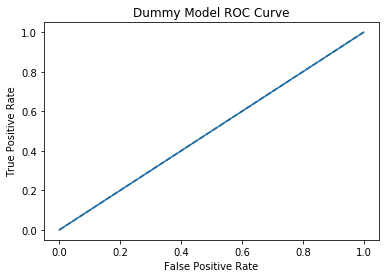

It takes 57.259 seconds for Logistic Regression fitting
Accuracy with Logistic Regressionon the testing set is: 0.707
PREDICTION      0     1  Total
TRUE                          
0            8324  1035   9359
1            3365  2276   5641
Total       11689  3311  15000
              precision    recall  f1-score   support

           0       0.71      0.89      0.79      9359
           1       0.69      0.40      0.51      5641

   micro avg       0.71      0.71      0.71     15000
   macro avg       0.70      0.65      0.65     15000
weighted avg       0.70      0.71      0.68     15000



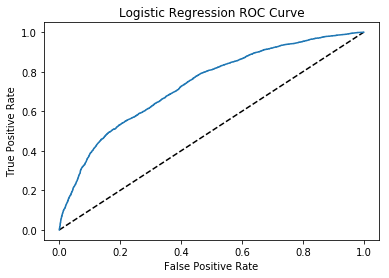

It takes 240.953 seconds for K Nearest Neighbors fitting
Accuracy with K Nearest Neighborson the testing set is: 0.752
PREDICTION     0     1  Total
TRUE                         
0           7768  1591   9359
1           2134  3507   5641
Total       9902  5098  15000
              precision    recall  f1-score   support

           0       0.78      0.83      0.81      9359
           1       0.69      0.62      0.65      5641

   micro avg       0.75      0.75      0.75     15000
   macro avg       0.74      0.73      0.73     15000
weighted avg       0.75      0.75      0.75     15000



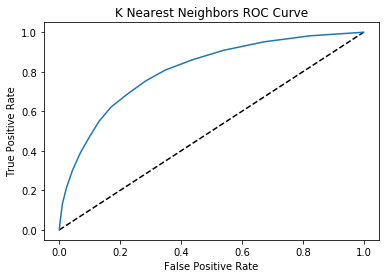

The SVM pipeline takes over 2 hours to complete.
It takes 8.116 seconds for Decision Tree fitting
Accuracy with Decision Treeon the testing set is: 0.762
PREDICTION      0     1  Total
TRUE                          
0            7901  1458   9359
1            2108  3533   5641
Total       10009  4991  15000
              precision    recall  f1-score   support

           0       0.79      0.84      0.82      9359
           1       0.71      0.63      0.66      5641

   micro avg       0.76      0.76      0.76     15000
   macro avg       0.75      0.74      0.74     15000
weighted avg       0.76      0.76      0.76     15000



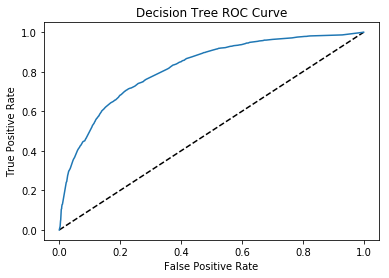

It takes 127.412 seconds for Random Forest fitting
Accuracy with Random Foreston the testing set is: 0.774
PREDICTION      0     1  Total
TRUE                          
0            7993  1366   9359
1            2026  3615   5641
Total       10019  4981  15000
              precision    recall  f1-score   support

           0       0.80      0.85      0.82      9359
           1       0.73      0.64      0.68      5641

   micro avg       0.77      0.77      0.77     15000
   macro avg       0.76      0.75      0.75     15000
weighted avg       0.77      0.77      0.77     15000



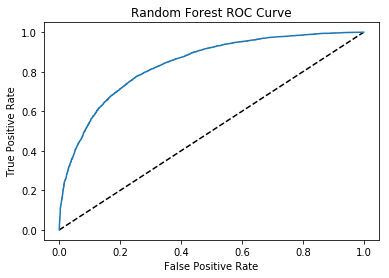

It takes 0.104 seconds for Naive Bayes fitting
Accuracy with Naive Bayeson the testing set is: 0.696
PREDICTION     0     1  Total
TRUE                         
0           6439  2920   9359
1           1645  3996   5641
Total       8084  6916  15000
              precision    recall  f1-score   support

           0       0.80      0.69      0.74      9359
           1       0.58      0.71      0.64      5641

   micro avg       0.70      0.70      0.70     15000
   macro avg       0.69      0.70      0.69     15000
weighted avg       0.71      0.70      0.70     15000



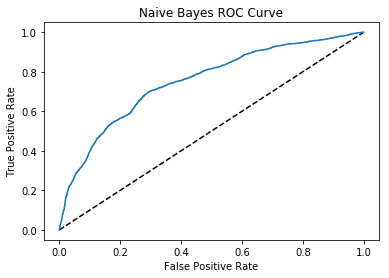

In [75]:

# add classifier to the preprocessor

# dummy model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                 ('classifier', classifier_dm)])
dm_cv = train_and_score_model('Dummy Model', pipeline, param_grid_dm)


# logistical regression
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', classifier_lr)])
lr_cv = train_and_score_model('Logistic Regression', pipeline, param_grid_lr)


# k nearest neighbors
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', classifier_knn)])
knn_cv = train_and_score_model('K Nearest Neighbors', pipeline, param_grid_knn)


# support vector machine
print('The SVM pipeline takes over 2 hours to complete.')
#pipeline = Pipeline(steps=[('preprocessor', preprocessor),
#                     ('classifier', classifier_svm)])
#svm_cv = train_and_score_model('Support Vector Machine', pipeline, param_grid_svm)


# decision tree
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', classifier_dt)])
dt_cv = train_and_score_model('Decision Tree', pipeline, param_grid_dt)


# random forest
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', classifier_rf)])
rf_cv = train_and_score_model('Random Forest', pipeline, param_grid_rf)

# GaussianNB
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', classifier_nb)])
nb_cv = train_and_score_model('Naive Bayes', pipeline, param_grid_nb)



In [76]:
# fill in the table of metrics for each model

metrics.astype(float).round(3)
actual_metrics = metrics.astype(float).round(3).loc[['accuracy', 'precision', 'recall', 'AUC']]*100
actual_metrics


,Dummy Model,Logistic Regression,K Nearest Neighbors,Support Vector Machine,Decision Tree,Random Forest,Naive Bayes
accuracy,62.4,70.7,75.2,NaN,76.2,77.4,69.6
precision,0.0,68.7,68.8,NaN,70.8,72.6,57.8
recall,0.0,40.3,62.2,NaN,62.6,64.1,70.8
AUC,50.0,73.5,80.7,NaN,81.9,84.0,75.2



Accuracy (A)
- the number of correct predictions over the total number of predictions


Precision (P)
- the number of true positives over the number of true positives plus the number of false positives


Recall (R)
- the number of true positives over the number of true positives plus the number of false negatives




As noted by each of the metrics in the table above, the RANDOM FOREST model performers the best on this data. For each metric, the greater the value, the better the model predicted the outcome.


For a classification problem, the probability threshold is 50%. Decide which is more important, Precision or Recall. 

If Precision is more important, increase the threshold, to decrease the number of predicted positives to include less false positives. 
- But this will decrease Recall.

If Recall is more important, lower the threshold to increase the number of predicted positives to include more of the actual positives. 
- But this will decrease Precision.

True/False Positives/Negatives
- True Positives = Predicted to be active, and actually active
- True Negatives = Predicted to be inactive, and actually inactive
- False Positives = Predicted to be active, but actually not active
- False Negatives = Predicted to be inactive, but actually active


## Use best model parameters to understand feature importance (Random Forest)

In [77]:
rf_cv.best_params_

{'classifier__criterion': 'entropy',
 'classifier__max_depth': 10,
 'classifier__max_features': 4,
 'classifier__min_samples_leaf': 1,
 'classifier__min_samples_split': 7,
 'classifier__n_estimators': 50,
 'preprocessor__num__imputer__strategy': 'mean'}

In [78]:
# instantiate the model/estimator
classifier_rf = RandomForestClassifier(random_state=0, criterion='entropy', max_depth=10, 
                                       max_features=4, min_samples_leaf=1, min_samples_split=7,
                                       n_estimators=50)

In [79]:
X_train.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
7319,16.94,4.7,4.7,1.0,Astapor,2014-03-30,iPhone,2014-01-16,0.0,0,True,66.7
48151,6.46,5.0,5.0,1.0,Astapor,2014-06-01,iPhone,2014-01-12,0.0,0,False,66.7
8382,0.93,5.0,4.5,1.0,Winterfell,2014-03-30,Android,2014-01-30,0.0,0,True,0.0
27764,4.24,5.0,5.0,1.0,King's Landing,2014-01-26,iPhone,2014-01-24,0.0,4,False,50.0
14133,0.98,4.5,4.0,1.0,Astapor,2014-01-19,iPhone,2014-01-17,0.0,2,True,0.0


In [80]:
X_train = X_train.drop(['last_trip_date', 'signup_date'], axis=1)
X_test = X_test.drop(['last_trip_date', 'signup_date'], axis=1)

# convert cities into numerical values
city_map = {"King's Landing":1, 'Astapor':2, 'Winterfell':3} # double quote for the ' in Kings
X_train.city = X_train.city.map(city_map)
X_test.city = X_test.city.map(city_map)

# convert phones into numerical values
phone_map = {'iPhone':1, 'Android':2, 'Unknown':3}
X_train.phone = X_train.phone.map(phone_map)
X_test.phone = X_test.phone.map(phone_map)

X_train.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,phone,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
7319,16.94,4.7,4.7,1.0,2,1,0.0,0,True,66.7
48151,6.46,5.0,5.0,1.0,2,1,0.0,0,False,66.7
8382,0.93,5.0,4.5,1.0,3,2,0.0,0,True,0.0
27764,4.24,5.0,5.0,1.0,1,1,0.0,4,False,50.0
14133,0.98,4.5,4.0,1.0,2,1,0.0,2,True,0.0


In [81]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35000 entries, 7319 to 44554
Data columns (total 10 columns):
avg_dist                  35000 non-null float64
avg_rating_by_driver      35000 non-null float64
avg_rating_of_driver      35000 non-null float64
avg_surge                 35000 non-null float64
city                      35000 non-null int64
phone                     35000 non-null int64
surge_pct                 35000 non-null float64
trips_in_first_30_days    35000 non-null int64
ultimate_black_user       35000 non-null bool
weekday_pct               35000 non-null float64
dtypes: bool(1), float64(6), int64(3)
memory usage: 2.7 MB


In [82]:
# fit on training
t0 = time.time()
classifier_rf.fit(X_train, y_train)
ttt = time.time() - t0 # ttt stands for "time to train"
print('It takes %.3f seconds for %s fitting' % (ttt, 'Random Forest'))

It takes 1.541 seconds for Random Forest fitting


In [83]:
# predict on test
y_pred = classifier_rf.predict(X_test)

Accuracy with Random Foreston the testing set is: 0.780
ROC AUC score is: 0.847
PREDICTION     0     1  Total
TRUE                         
0           8003  1356   9359
1           1945  3696   5641
Total       9948  5052  15000
              precision    recall  f1-score   support

           0       0.80      0.86      0.83      9359
           1       0.73      0.66      0.69      5641

   micro avg       0.78      0.78      0.78     15000
   macro avg       0.77      0.76      0.76     15000
weighted avg       0.78      0.78      0.78     15000



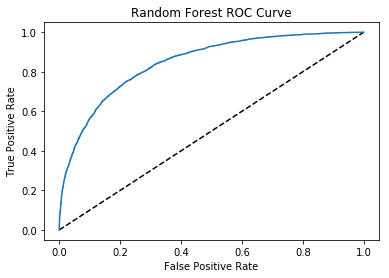

In [84]:
# scoring the random forest model

## accuracy
print("Accuracy with " + 'Random Forest' + "on the testing set is: %.3f" % classifier_rf.score(X_test, y_test))

y_pred_prob = classifier_rf.predict_proba(X_test)[:,1]
print("ROC AUC score is: %.3f" %roc_auc_score(y_test, y_pred_prob))

print(Conf_Matrix(confusion_matrix(y_test, y_pred)))
print(classification_report(y_test, y_pred))

## ROC Curve
fpr, tpr, thresholds  = roc_curve(y_test, y_pred_prob)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('%s ROC Curve' % 'Random Forest')
plt.show()

In [85]:
# create a df with the features and their importance

model_importance = pd.DataFrame(classifier_rf.feature_importances_,
                                index = X_train.columns, 
                                columns = ['importance']).sort_values('importance', 
                                                                      ascending=False)
model_importance

,importance
avg_rating_by_driver,0.177351
surge_pct,0.154480
city,0.154429
weekday_pct,0.110057
avg_surge,0.088521
phone,0.081144
avg_dist,0.078708
trips_in_first_30_days,0.063916
ultimate_black_user,0.056686
avg_rating_of_driver,0.034709


The top three most importance features were:
1. average_rating_by_driver
2. surge_pct
3. city

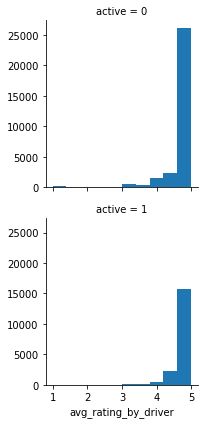

In [86]:
# plot 'avg_rating_by_driver' histogram per 'active' or 'not active'

g = sns.FacetGrid(df, row='active')
g = g.map(plt.hist, 'avg_rating_by_driver')

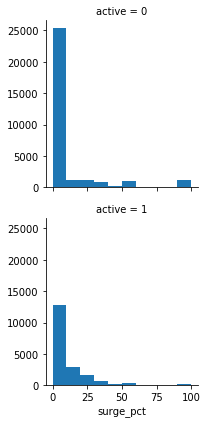

In [87]:
# plot 'surge_pct' histogram per 'active' or 'not active'

g = sns.FacetGrid(df, row='active')
g = g.map(plt.hist, 'surge_pct')

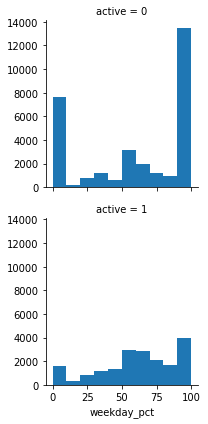

In [88]:
# plot 'weekday_pct' histogram per 'active' or 'not active'

g = sns.FacetGrid(df, row='active')
g = g.map(plt.hist, 'weekday_pct')